In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [54]:
#load y_test, y_pred
with open('../SVR_final_results.csv', 'rb') as f:
    import csv
    cr = csv.reader(f)
    header = cr.next()
    y_true, y_pred = [], []
    for row in cr:
        y_true.append(float(row[1]))
        y_pred.append(float(row[2]))

In [55]:
#load y_test, y_pred
with open('../SVR_training_results.csv', 'rb') as f:
    import csv
    cr = csv.reader(f)
    header = cr.next()
    y_train = []
    for row in cr:
        y_train.append(float(row[1]))

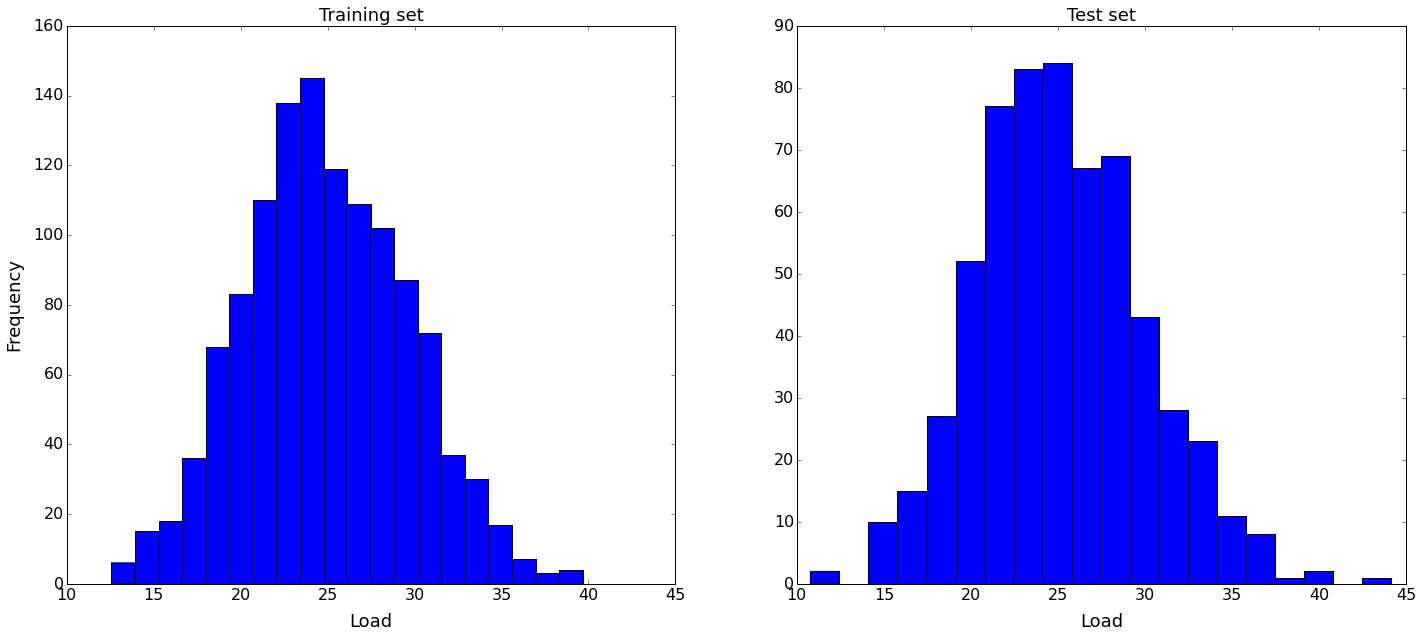

In [56]:
#basic histogram of load ratings
fig, ax = plt.subplots(1,2,sharey=False, figsize=(24,10))
ax[0].hist(y_train, bins=20)
ax[0].set_title('Training set', fontsize=18)

ax[1].hist(y_true, bins=20)
ax[1].set_title('Test set', fontsize=18)

for a in ax:
    a.tick_params(labelsize=16)
    a.set_xlim((10, 45))
#     a.grid(True)

    a.set_ylabel('Frequency', fontsize=18, labelpad=10)
    a.set_xlabel('Load', fontsize=18, labelpad=10)
    
ax[1].set_ylabel('')



In [57]:
print y_train

[23.38062569050243, 27.000506219666196, 15.354547061829127, 24.59878494426571, 24.520765236925673, 21.905671049080443, 28.401064700520507, 24.316588617293846, 24.276034840219257, 27.6341086981115, 23.481790826093636, 25.95750832266629, 26.96074362303934, 24.08019909202828, 21.43723215171424, 18.441573322514984, 16.8138588854264, 29.059768792663135, 33.91992081975562, 30.842027532553015, 25.5597895047157, 13.893990330065327, 25.14787889579136, 24.18544728990394, 23.23274846005911, 27.047439655956413, 22.06342259518036, 20.947848780987503, 18.688045615217277, 20.173377134478184, 19.93545678205582, 25.754689544690546, 30.38504374480844, 22.639386252958595, 20.110549208120506, 24.031879522770183, 23.56310299469379, 20.75695061447567, 21.958776356540092, 21.072416835375602, 16.358916055956872, 25.292593443737363, 31.8882256517923, 18.977535388684483, 28.94632610265676, 15.049107757606915, 28.38244317717163, 23.366057486674016, 26.27331890188187, 31.80031410667066, 29.84408061773179, 28.5261

In [58]:
#put with original inds
y_true_winds = [(ii, y) for ii,y in enumerate(y_true)]
y_pred_winds = [(ii, y) for ii,y in enumerate(y_pred)]
y_train_winds = [(ii, y) for ii,y in enumerate(y_train)]

In [59]:
#sort
y_pred_winds = sorted(y_pred_winds, key = lambda x: -x[1])
y_true_winds = sorted(y_true_winds, key = lambda x: -x[1])
y_train_winds = sorted(y_train_winds, key = lambda x: -x[1])

In [60]:
#threshold by percentage
total = len(y_true_winds)
pct_list = [x for x in range(1,100)]
acc_list = []
for pct in pct_list:
    num_in_pct = int(total*pct/float(100))
    #print num_in_pct
    y_true_top = y_true_winds[:num_in_pct]
    y_pred_top = y_pred_winds[:num_in_pct]

    #get list of indices in top %
    top_true_inds = [x[0] for x in y_true_top]
    top_pred_inds = [x[0] for x in y_pred_top]

    #get number of TPs
    combined = top_true_inds + top_pred_inds
    TPs = list(set([x for x in combined if combined.count(x)>1]))
    acc = len(TPs)/float(num_in_pct)
    acc_list.append(100*acc)

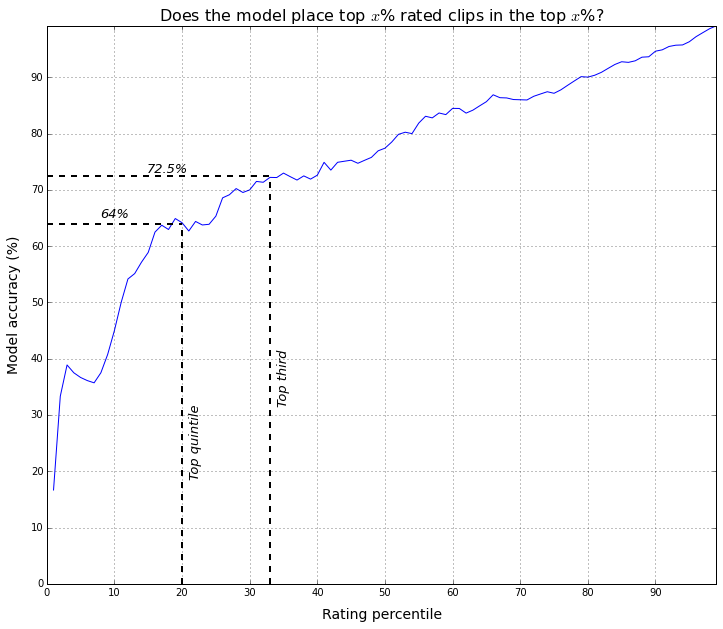

In [61]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(pct_list, acc_list)
ax.set_xlabel('Rating percentile', labelpad=10, fontsize=14)
ax.set_ylabel('Model accuracy (%)', labelpad=10, fontsize=14)
ax.set_yticks(np.arange(0,100,10))
ax.set_yticklabels(np.arange(0,100,10))
ax.set_xticks(np.arange(0,100,10))
ax.set_xticklabels(np.arange(0,100,10))

#draw accuracy line
param_dict = {'color': 'k', 'linewidth': 2, 'linestyle': '--'}
ax.plot([33, 33], [0,72.5], **param_dict)
ax.plot([0, 33], [72.5,72.5], **param_dict)

ax.plot([20, 20], [0,64], **param_dict)
ax.plot([0, 20], [64,64], **param_dict)

#text
text_pd = {'fontsize': 13, 'style': 'italic'}
ax.text(34,40,'Top third', rotation=90, **text_pd)
ax.text(21,30,'Top quintile', rotation=90, **text_pd)
ax.text(15,73,'72.5%',**text_pd)
ax.text(8,65,'64%',**text_pd)
ax.grid(b=True)

#title
ax.set_title(r'Does the model place top $x$% rated clips in the top $x$%?', fontsize=16)
plt.savefig('/home/lpa8529/Desktop/model_res.png', bbox='tight')

In [62]:
#convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_train = np.array(y_train)
y_true_norm = y_true-np.mean(y_true)

In [63]:
num_bins = 4 #how many bins to split whole list into

#split the y_train list into 4 equally sized
pct_bins = np.percentile(y_train, [20,40,60,80,100])

In [64]:
train_bins = np.digitize(y_train, pct_bins)
test_bins = np.digitize(y_true, pct_bins)
pred_bins = np.digitize(y_pred, pct_bins)

In [65]:
y_true_perbin = []
y_pred_perbin = []
residuals = []
bin_inds_list=[]
#loop through bin numbers
for pct_bin in range(len(pct_bins)):
    
    #get indices with this bin
    bin_inds = test_bins == pct_bin
    bin_inds_list.append(bin_inds)
    
    #get residuals
    bin_residuals = (y_true[bin_inds] - y_pred[bin_inds])
    residuals.append(bin_residuals)  
    
    #get true y values for this bin (for context)
    y_true_perbin.append(y_true[bin_inds])
    y_pred_perbin.append(y_pred[bin_inds])

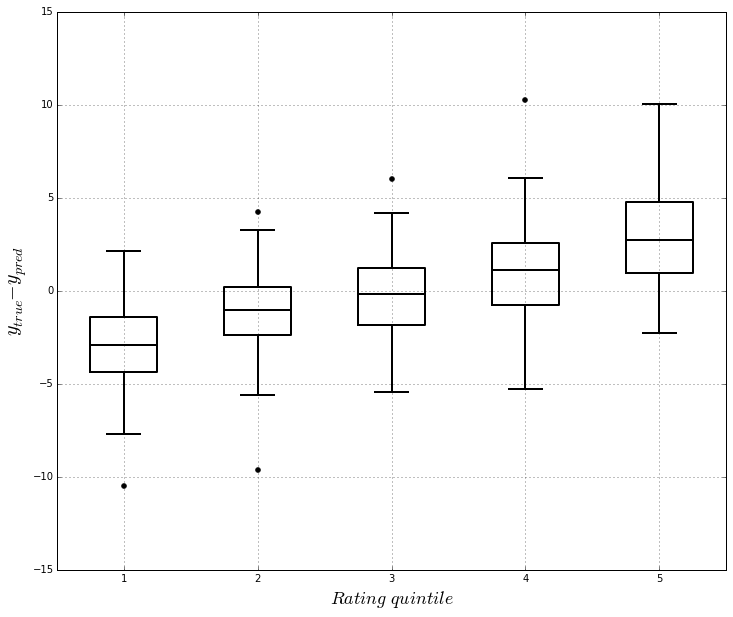

In [93]:
fig, ax = plt.subplots(figsize=(12,10))
box_params = {'linestyle':'-', 'color':'black', 'linewidth':2}
whisker_params = {'linestyle':'-', 'color':'black', 'linewidth':2}
median_params = {'linestyle':'-', 'color':'black', 'linewidth':2}
flier_params = {'marker': 'o', 'markersize':5, 'color':'black'}
cax = ax.boxplot(residuals, bootstrap=1000, whiskerprops=whisker_params, boxprops=box_params, 
                 capprops=whisker_params, medianprops=median_params, flierprops=flier_params)
ax.grid(True)
ax.set_ylabel(r'$y_{true} - y_{pred}$', fontsize=20)
ax.set_xlabel(r'$Rating$ $quintile$', fontsize=18)

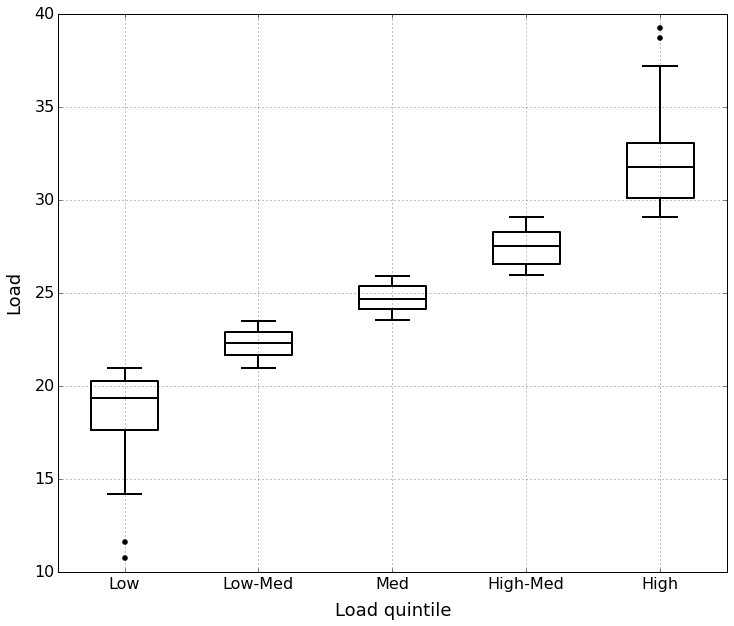

In [94]:


#boxplot of actual values for comparison
fig, ax = plt.subplots(figsize=(12,10))
cax = ax.boxplot(y_true_perbin, whiskerprops=whisker_params, boxprops=box_params, 
                 capprops=whisker_params, medianprops=median_params, flierprops=flier_params)
ax.grid(True)

ax.set_xticklabels(['Low','Low-Med','Med','High-Med','High'])
ax.tick_params(labelsize=16)
ax.set_xlim((0.5,5.5))
ax.set_ylim((10,40))

ax.set_ylabel('Load', fontsize=18, labelpad=10)
ax.set_xlabel('Load quintile', fontsize=18, labelpad=10)

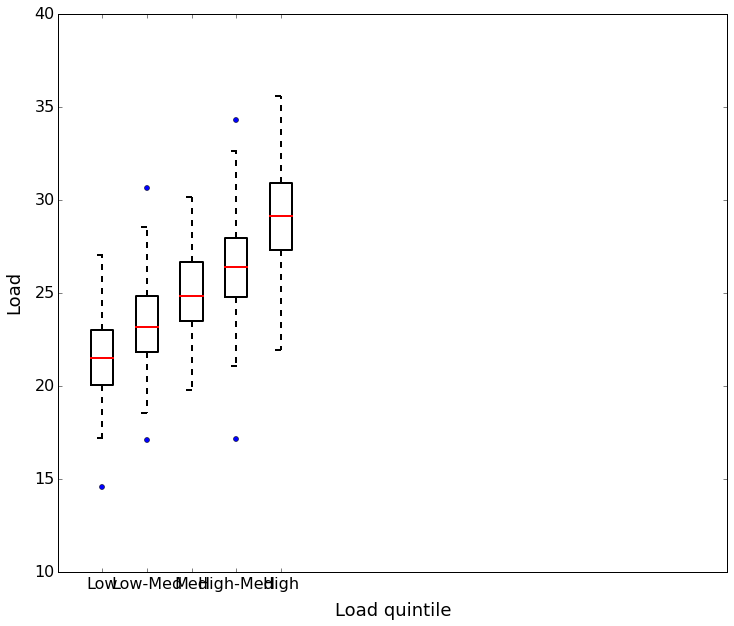

In [84]:
#boxplot of actual values for comparison
fig, ax = plt.subplots(figsize=(12,10))
cax = ax.boxplot(y_pred_perbin, bootstrap=1000, whiskerprops=whisker_params, boxprops=box_params, 
                 capprops=whisker_params, medianprops=median_params, flierprops=flier_params)
#ticks labels etc
ax.set_xticklabels(['Low','Low-Med','Med','High-Med','High'])
ax.tick_params(labelsize=16)
ax.set_xlim((0,15))
ax.set_ylim((10,40))

ax.set_ylabel('Load', fontsize=18, labelpad=10)
ax.set_xlabel('Load quintile', fontsize=18, labelpad=10)

In [69]:
from scipy.stats import ttest_ind, f_oneway

In [70]:
f_oneway(y_pred_perbin[0], y_pred_perbin[1], y_pred_perbin[2],  y_pred_perbin[3],  y_pred_perbin[4])

(172.75058694557706, 3.7632640980781264e-98)

In [71]:
ttest_ind(y_pred_perbin[0], y_pred_perbin[4])

(-24.041301900442946, 8.3568684606596535e-65)

In [72]:
TPs = np.logical_and(pred_bins==4, test_bins==4)

In [73]:
TP_rate = np.sum(TPs)/float(np.sum(pred_bins==4))

In [74]:
print '{0}% of situations predicted to be high load were (in top quintile)'.format(TP_rate)

0.702380952381% of situations predicted to be high load were (in top quintile)


In [75]:
FNs = np.logical_and(pred_bins!=4, test_bins==4)

In [76]:
FN_rate = np.sum(FNs)/float(np.sum(test_bins==4))

In [77]:
FN_rate

0.49572649572649574

In [78]:
#plot standard error in the means
means_pred = [np.mean(x) for x in y_pred_perbin]
st_errors_pred = [np.std(x)/float(np.sqrt(len(x))) for x in y_pred_perbin]

means_true = [np.mean(x) for x in y_true_perbin]
st_errors_true = [np.std(x)/float(np.sqrt(len(x))) for x in y_true_perbin]

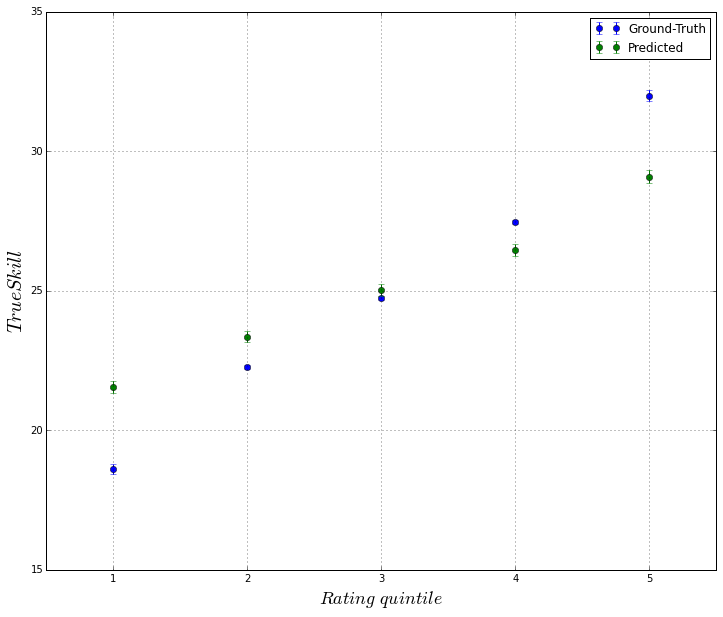

In [79]:
fig, ax = plt.subplots(figsize=(12,10))
GT = ax.errorbar([1,2,3,4,5], means_true, yerr=st_errors_true, fmt='o')
PRED = ax.errorbar([1,2,3,4,5], means_pred, yerr=st_errors_pred, fmt='o')
ax.grid(True)
ax.set_ylabel(r'$TrueSkill$', fontsize=20)
ax.set_xlabel(r'$Rating$ $quintile$', fontsize=18)
ax.set_xticks([.5, 1, 2, 3, 4, 5, 5.5])
ax.set_xticklabels(['', '1', '2', '3', '4', '5', ''])
ax.set_ylim((15,35))
plt.legend([GT,PRED], ['Ground-Truth', 'Predicted'])

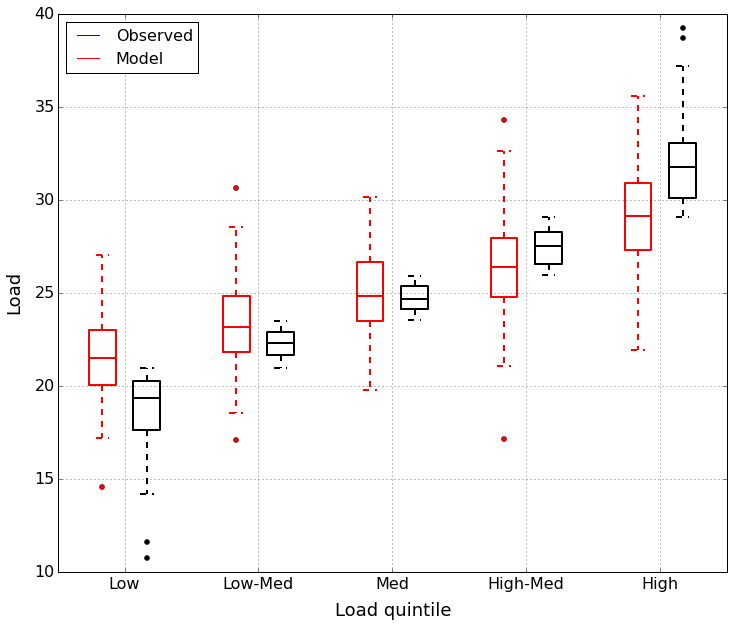

In [90]:
#align the quintiles in the boxplots
fig, ax = plt.subplots(figsize=(12,10))

#utility func for changing colors
def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color='red')
    plt.setp(bp['caps'][0], color='red')
    plt.setp(bp['caps'][1], color='red')
    plt.setp(bp['whiskers'][0], color='red')
    plt.setp(bp['whiskers'][1], color='red')
    plt.setp(bp['medians'][0], color='red')
    plt.setp(bp['fliers'][0], color='red')
    
    plt.setp(bp['boxes'][1], color='black')
    plt.setp(bp['caps'][2], color='black')
    plt.setp(bp['caps'][3], color='black')
    plt.setp(bp['whiskers'][2], color='black')
    plt.setp(bp['whiskers'][3], color='black')
    plt.setp(bp['medians'][1], color='black')
    plt.setp(bp['fliers'][1], color='black')

for ii, (y_true_q, y_pred_q) in enumerate(zip(y_pred_perbin, y_true_perbin), start=1):
    bp_pos = ii*3-2
    
    plt.hold(True)
    bp = ax.boxplot([y_true_q, y_pred_q], positions=[bp_pos,bp_pos+1], widths=.6, whiskerprops=whisker_params, boxprops=box_params, 
                 capprops=whisker_params, medianprops=median_params, flierprops=flier_params)
    setBoxColors(bp)
    ax.grid(True)

#temp lines for legend

hR, = plt.plot([1,1],'r-')
hB, = plt.plot([1,1],'b-')
plt.legend((hB, hR),('Observed', 'Model'), fontsize=16, loc=2)
hB.set_visible(False)
hR.set_visible(False)

#ticks labels etc
ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
ax.set_xticklabels(['Low','Low-Med','Med','High-Med','High'])
ax.tick_params(labelsize=16)
ax.set_xlim((0,15))
ax.set_ylim((10,40))

ax.set_ylabel('Load', fontsize=18, labelpad=10)
ax.set_xlabel('Load quintile', fontsize=18, labelpad=10)